# THE FOLLOWING PROJECT IS IMPLEMENTED USING **CRISP-DM** METHODOLOGY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

**LOADING THE DATASET**

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# DATA UNDERSTANDING

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.step.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
df.step.nunique()

743

<Axes: >

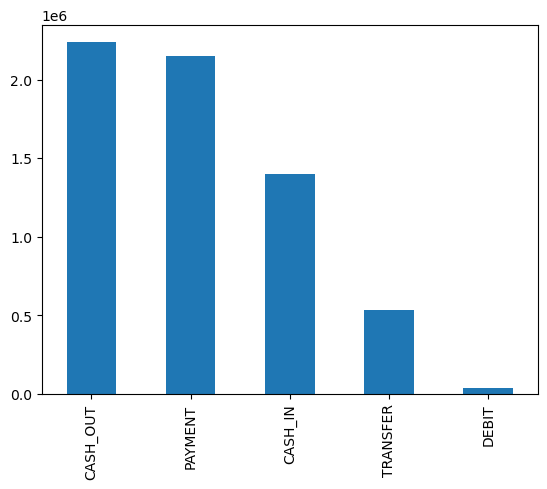

In [7]:
df.type.value_counts().plot(kind='bar')

In [8]:
df.amount.unique()

array([9.83964000e+03, 1.86428000e+03, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [9]:
df.amount.nunique()

5316900

In [10]:
df[df['amount']>200]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [12]:
df['nameOrig'].nunique()

6353307

In [13]:
df.oldbalanceOrg.unique()

array([1.70136000e+05, 2.12490000e+04, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [14]:
df.oldbalanceOrg.nunique()

1845844

In [15]:
df.newbalanceOrig.unique()

array([1.60296360e+05, 1.93847200e+04, 0.00000000e+00, ...,
       2.56745479e+07, 1.56745479e+07, 5.67454789e+06])

In [16]:
df.newbalanceOrig.nunique()

2682586

In [17]:
df['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [18]:
df[df['nameOrig']==df['nameDest']]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [19]:
df['nameDest'].nunique()

2722362

In [20]:
df['nameDest'].mode()

0    C1286084959
Name: nameDest, dtype: object

In [21]:
freq_dest_df = df[df['nameDest']=='C1286084959']
freq_dest_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
93,1,TRANSFER,583848.46,C1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0,0
367,1,TRANSFER,176334.26,C169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0
388,1,CASH_OUT,373068.26,C1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0
471,1,CASH_IN,403418.39,C848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0
642,1,CASH_IN,222126.95,C870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,C86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0
4832993,347,CASH_OUT,235564.75,C1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0
5566959,393,CASH_IN,119568.31,C1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0
5596560,394,CASH_OUT,381887.53,C1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0


In [22]:
freq_dest_df['isFraud'].unique()

array([0], dtype=int64)

In [23]:
freq_dest_df['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [24]:
merchant_df = df[df['nameDest'].str.startswith('M')]
merchant_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [25]:
merchant_df.isFraud.unique()

array([0], dtype=int64)

In [26]:
merchant_df.isFlaggedFraud.unique()

array([0], dtype=int64)

In [27]:
df.oldbalanceDest.nunique()

3614697

In [28]:
df.newbalanceDest.nunique()

3555499

In [29]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [30]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [31]:
fraud_df = df[df['isFraud']==1]

In [32]:
fraud_df.isFlaggedFraud.sum()

16

In [33]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

**RATIO OF FRAUDULENT TRANSACTIONS**

In [34]:
print('The ratio of Fraudulent transaction is 1 :',6362620//8213)

The ratio of Fraudulent transaction is 1 : 774


For every 774 transactions one fraudulent transaction is appearing

**TOTAL MONEY LOSS IN FRAUD**

In [35]:
df[df['isFraud']==1].amount.sum()

12056415427.839998

The total amount loss due to Fraud is:**12056415427.839998**

In [36]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [37]:
continous  = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
discrete = ['type','isFraud','isFlaggedFraud']

**Checking Missing Values**

In [38]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values

# EXPLORATORY DATA ANALYSIS

In [39]:
df[continous].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [40]:
#sns.pairplot(df,hue='isFraud')

In [41]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

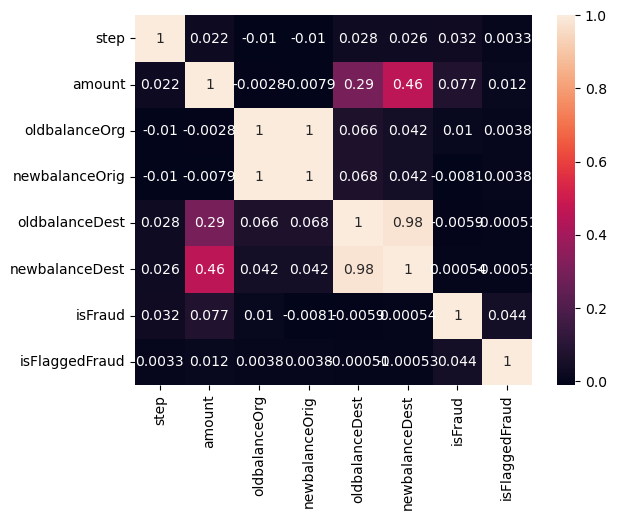

In [42]:
sns.heatmap(df.corr(),annot=True)

No multi-collinearity observed

In [43]:
print(df['step'].skew(),df['amount'].skew(),df['oldbalanceOrg'].skew(),df['newbalanceOrig'].skew(),df['oldbalanceDest'].skew(),df['newbalanceDest'].skew())

0.37517688846984765 30.99394948249038 5.249136420603121 5.176884001159233 19.921757915791062 19.352302057660165


In [44]:
df[discrete].describe()

,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06
mean,1.290820e-03,2.514687e-06
std,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [45]:
'''plt.figure(figsize=(20,30))

plt.subplot(2,2,1)
sns.catplot(x ='isFraud', y ='amount',data = df, kind ='bar',hue = 'type')

plt.subplot(2,2,2)
plt.pie(x=df['isFraud'].value_counts(),labels=['not Fraud','Fraud'],autopct = '%0.2f%%')

plt.subplot(2,2,3)
plt.pie(x=df['isFlaggedFraud'].value_counts(),labels=['not flagged Fraud','flagged Fraud'],autopct = '%0.5f%%')

plt.show()'''

"plt.figure(figsize=(20,30))\n\nplt.subplot(2,2,1)\nsns.catplot(x ='isFraud', y ='amount',data = df, kind ='bar',hue = 'type')\n\nplt.subplot(2,2,2)\nplt.pie(x=df['isFraud'].value_counts(),labels=['not Fraud','Fraud'],autopct = '%0.2f%%')\n\nplt.subplot(2,2,3)\nplt.pie(x=df['isFlaggedFraud'].value_counts(),labels=['not flagged Fraud','flagged Fraud'],autopct = '%0.5f%%')\n\nplt.show()"

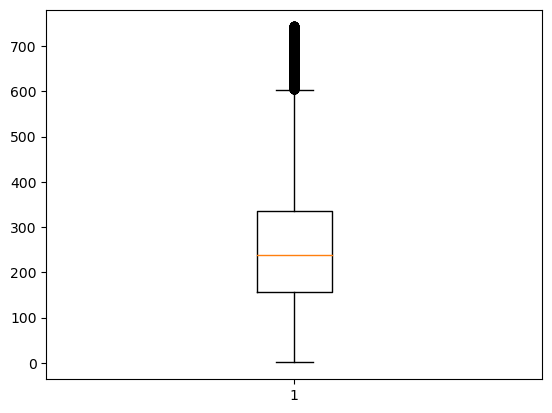

In [46]:
plt.boxplot(x=df['step'])
plt.show()

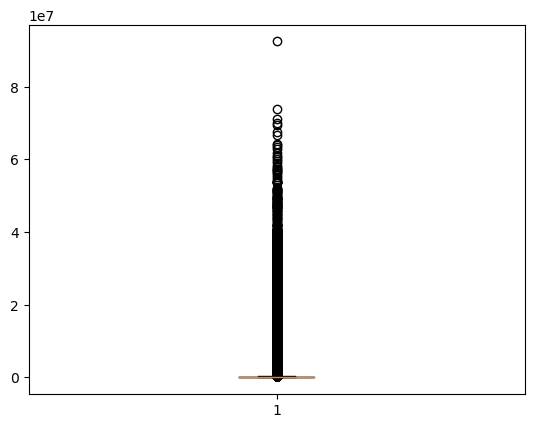

In [47]:
plt.boxplot(x=df['amount'])
plt.show()

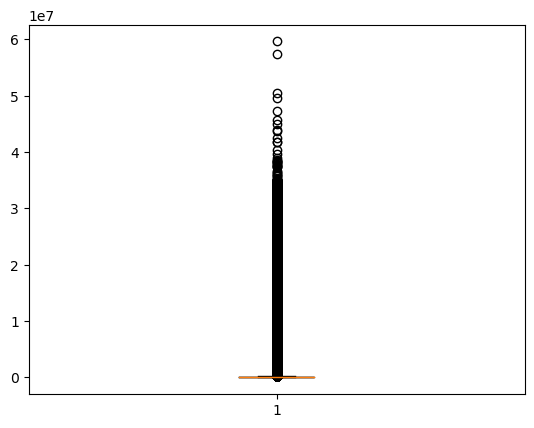

In [48]:
plt.boxplot(x=df['oldbalanceOrg'])
plt.show()

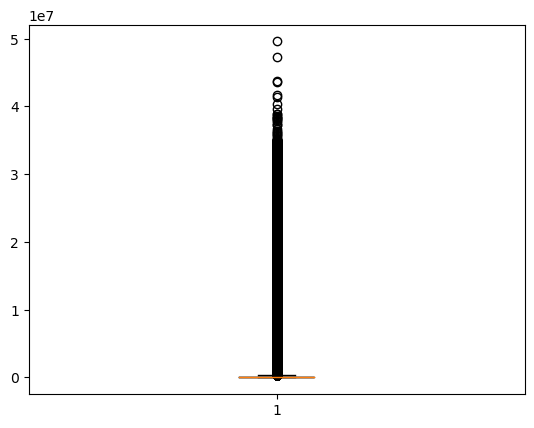

In [49]:
plt.boxplot(x=df['newbalanceOrig'])
plt.show()

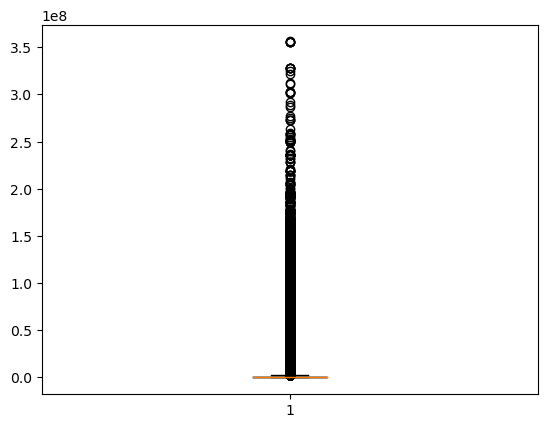

In [50]:
plt.boxplot(x=df['oldbalanceDest'])
plt.show()

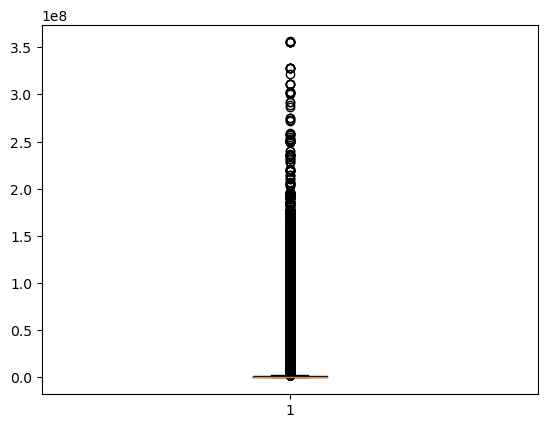

In [51]:
plt.boxplot(x=df['newbalanceDest'])
plt.show()

Retraining outliers

# DATA PREPROCESSING

**DATA CLEANING**

Treating Duplicate Values

In [52]:
df.duplicated().sum()

543

In [53]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [54]:
df[df['amount']==0]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736165,212,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
3246979,250,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
3759919,279,CASH_OUT,0.0,0.0,0.0,538547.63,538547.63,1,0
5563214,387,CASH_OUT,0.0,0.0,0.0,7970766.57,7970766.57,1,0
5995878,425,CASH_OUT,0.0,0.0,0.0,76759.90,76759.90,1,0
5995880,425,CASH_OUT,0.0,0.0,0.0,2921531.34,2921531.34,1,0
6167967,554,CASH_OUT,0.0,0.0,0.0,230289.66,230289.66,1,0
6204907,586,CASH_OUT,0.0,0.0,0.0,1328472.86,1328472.86,1,0
6265877,617,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0
6280944,646,CASH_OUT,0.0,0.0,0.0,0.00,0.00,1,0


**DATA WRANGLING**

**Feature Encoding**

In [55]:
#Nominal encoding --> dummy encoding
dum = pd.get_dummies(df['type'],drop_first=True)
df = pd.concat((dum,df),axis='columns')
df.drop(columns='type',inplace=True)

**Feature scaling**

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = sc.fit_transform(df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])

In [57]:
df

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,1,0,-1.703053,-0.281622,-0.229820,-0.237637,-0.323829,-0.333423,0,0
1,0,0,1,0,-1.703053,-0.294833,-0.281368,-0.285826,-0.323829,-0.333423,0,0
2,0,0,0,1,-1.703053,-0.297621,-0.288662,-0.292455,-0.323829,-0.333423,1,0
3,1,0,0,0,-1.703053,-0.297621,-0.288662,-0.292455,-0.317598,-0.333423,1,0
4,0,0,1,0,-1.703053,-0.278593,-0.274338,-0.282235,-0.323829,-0.333423,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362072,1,0,0,0,3.510099,0.264752,-0.171120,-0.292455,-0.323829,-0.240973,1,0
6362073,0,0,0,1,3.510099,10.156735,1.896423,-0.292455,-0.323829,-0.333423,1,0
6362074,1,0,0,0,3.510099,10.156735,1.896423,-0.292455,-0.303681,1.402961,1,0
6362075,0,0,0,1,3.510099,1.110082,0.005564,-0.292455,-0.323829,-0.333423,1,0


**Separating input and output variables**

In [58]:
X = df.drop(columns = 'isFraud')
y = df['isFraud']

# MODELLING

In [59]:
#IDENTIFYING BEST RANDOM STATE NUMBER

**Splitting into train and test**

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**LOGISTIC REGRESSION**

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)
    
from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy').mean())

acc_train: 0.9992250957382034
acc_test: 0.9992266680079471
cross_val: 0.9992174331394444


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[1270695,      56],
       [    928,     737]], dtype=int64)

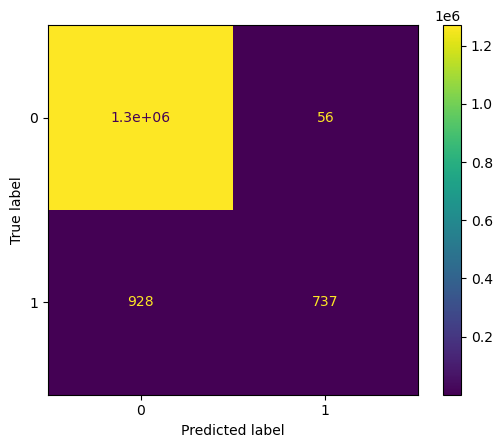

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df.isFraud.unique()).plot()
plt.show()

In [68]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270751
           1       0.93      0.44      0.60      1665

    accuracy                           1.00   1272416
   macro avg       0.96      0.72      0.80   1272416
weighted avg       1.00      1.00      1.00   1272416



**KNN**

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param = {'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(estimator,param,scoring='accuracy',cv=5)
knn.fit(X_train,y_train)

knn_model = knn.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy').mean())'''

**SVM**

In [ ]:
'''from sklearn.svm import SVC

estimator = SVC()
param = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm = GridSearchCV(estimator,param,scoring='accuracy',cv=5)
svm.fit(X_train,y_train)

svm_model = svm.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
print('acc_train:',accuracy_score(y_train,ypred_train))
print('acc_test:',accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
print('cross_val:',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())'''

**DECISION TREE**

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=rs)
param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

dt_model = model.best_estimator_

imp_dt = dt_model.feature_importances_

index = [i for i,x in enumerate(imp_dt) if x>0]

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt_model.fit(X_train_dt,y_train)

#prediction
ypred_train_dt = dt_model.predict(X_train_dt)
ypred_test_dt = dt_model.predict(X_test_dt)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train_dt)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test_dt)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(dt_model,X_train_dt,y_train,cv=5).mean()
print('cross_val:',cross_val)'''

**RANDOM FOREST**

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state=rs)
param = {'n_estimators':list(range(1,51))}
model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

rf_model = model.best_estimator_

imp_rf = rf_model.feature_importances_

index = [i for i,x in enumerate(imp_rf) if x>0]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf_model.fit(X_train_rf,y_train)

#prediction
ypred_train = rf_model.predict(X_train_rf)
ypred_test = rf_model.predict(X_test_rf)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf_model,X_train_rf,y_train,cv=5).mean()
print('cross_val:',cross_val)'''

**ADABOOST**

In [ ]:
'''from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier(random_state=rs)
param = {'n_estimators':list(range(1,51))}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

ab_model = model.best_estimator_

imp_ab = ab_model.feature_importances_

index = [i for i,x in enumerate(imp_ab) if x>0]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab_model.fit(X_train_ab,y_train)

#prediction
ypred_train = ab_model.predict(X_train_ab)
ypred_test = ab_model.predict(X_test_ab)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(ab_model,X_train_ab,y_train,cv=5).mean()
print('cross_val:',cross_val)'''

**GRADIENT BOOST**

In [ ]:
'''from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier(random_state=rs)
param = {'n_estimators':list(range(1,11)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.8,1]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

gb_model = model.best_estimator_

imp_gb = gb_model.feature_importances_

index = [i for i,x in enumerate(imp_gb) if x>0]

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb_model.fit(X_train_gb,y_train)

#prediction
ypred_train = gb_model.predict(X_train_gb)
ypred_test = gb_model.predict(X_test_gb)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(gb_model,X_train_gb,y_train,cv=5).mean()
print('cross_val:',cross_val)'''

**XGBOOST**

In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(random_state=rs)
param = {'n_estimators':list(range(1,11)),'max_depth':[3,5,7,9,10,12,15],'gamma':[0.1,0.2,0.3,0.4,0.5]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

xgb_model = model.best_estimator_

imp_xgb = xgb_model.feature_importances_

index = [i for i,x in enumerate(imp_xgb) if x>0]

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgb_model.fit(X_train_xgb,y_train)

#prediction
ypred_train = xgb_model.predict(X_train_xgb)
ypred_test = xgb_model.predict(X_test_xgb)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(xgb_model,X_train_xgb,y_train,cv=5).mean()
print('cross_val:',cross_val)'''

# MODEL SELECTION

SELECTING LOGISTIC REGRESSION MODEL WITH ACCURACY **99.92%**

# QUESTIONS

**1. Data cleaning including missing values, outliers and multi-collinearity.**

There were no missing values in the dataset.

I have retrain the outliers.

There was no multicollinearity observed in the records

**2. Describe your fraud detection model in elaboration.**

The Machine Learning model for Fraud Transaction Detection was implemented using CRISP-DM Methodology.It includes 6 steps namely Business Understanding, Data Understanding, Data Preparation, Modelling, Evaluation and Presentation.

**3. How did you select variables to be included in the model?**

I have used feature selection techniques to removed the unnecessary features and only used the necessary ones.

**4. Demonstrate the performance of the model by using best set of tools.**

The performance of the model is given by 99.91% accuracy. I have used accuracy score, confusion matrix and classification report for the evaluation.

**5. What are the key factors that predict fraudulent customer?**

step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest	are the key factors that predict fraudulent customer.

**6. Do these factors make sense? If yes, How? If not, How not?**

Yes, this factors absolutely make sense as the money loss via fraud depends on the amount as fraud agents try to empty the funds by transferring to another accounts and also by seeking the sensitive informations.The irregular behaviour in withdraws of the person can be used to detect the fraud, which includes their transaction records, their account balance before and after. In this similar way the Dest factor also plays a crucial role whether the money is taken by fraud agent.

**7. What kind of prevention should be adopted while company update its infrastructure?**

The company should use a Machine Learning model to detect the Fraud Transactions and take the record of his account balance.When the user enters the amount for transaction it sholud be detected beforehand should warn the user about the fraud transaction. It can actually prevent having fraud transactions.

**8. Assuming these actions have been implemented, how would you determine if they work**

The user would become aware of the fraud transaction and can complain of it and can be easily caught.